<a href="https://colab.research.google.com/github/madhumithasuresh-06/MachineLearningProjects/blob/main/HeartDiseaseDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [48]:
data=pd.read_csv('/content/processed.cleveland.data',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [49]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [50]:
data.shape

(303, 14)

In [51]:
data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [52]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,13
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [53]:
data = data.replace('?', None)


In [54]:
data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Handling missing values
1. Imputation(central tendancy)
2.Dropping

/tmp/ipython-input-792898272.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[11])


<Axes: xlabel='11', ylabel='Density'>

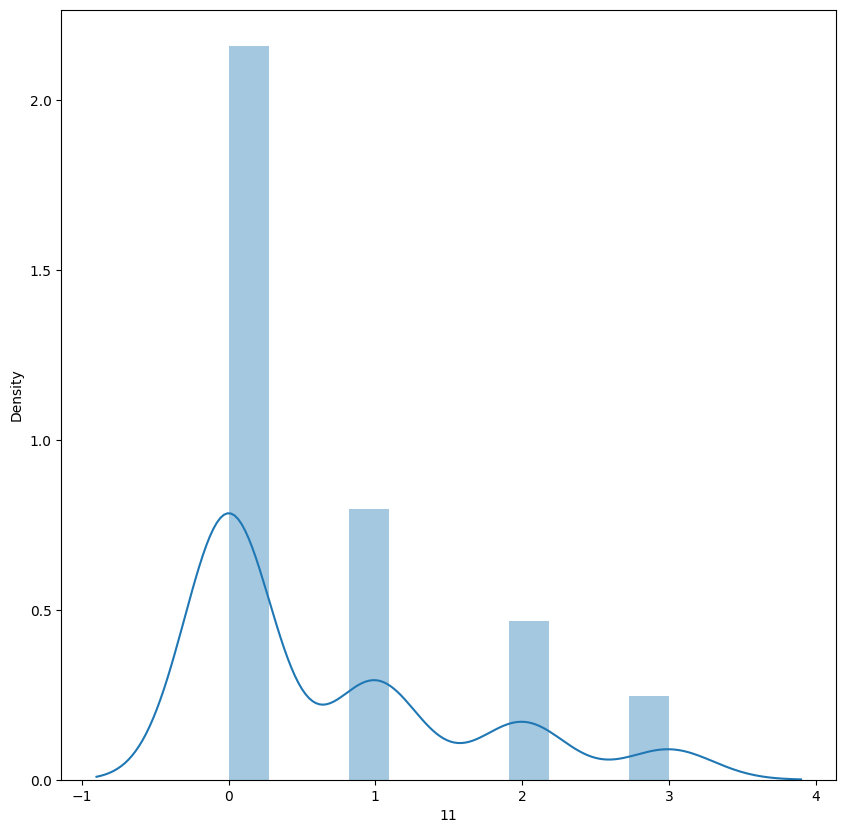

In [55]:
fig,ax=plt.subplots(figsize=(10,10))
sns.distplot(data[11])


 values are not distributed properly so mean is not possible to apply
 median or mode

In [60]:
data[11].fillna(data[11].mode()[0],inplace=True)

/tmp/ipython-input-357874891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[12])


<Axes: xlabel='12', ylabel='Density'>

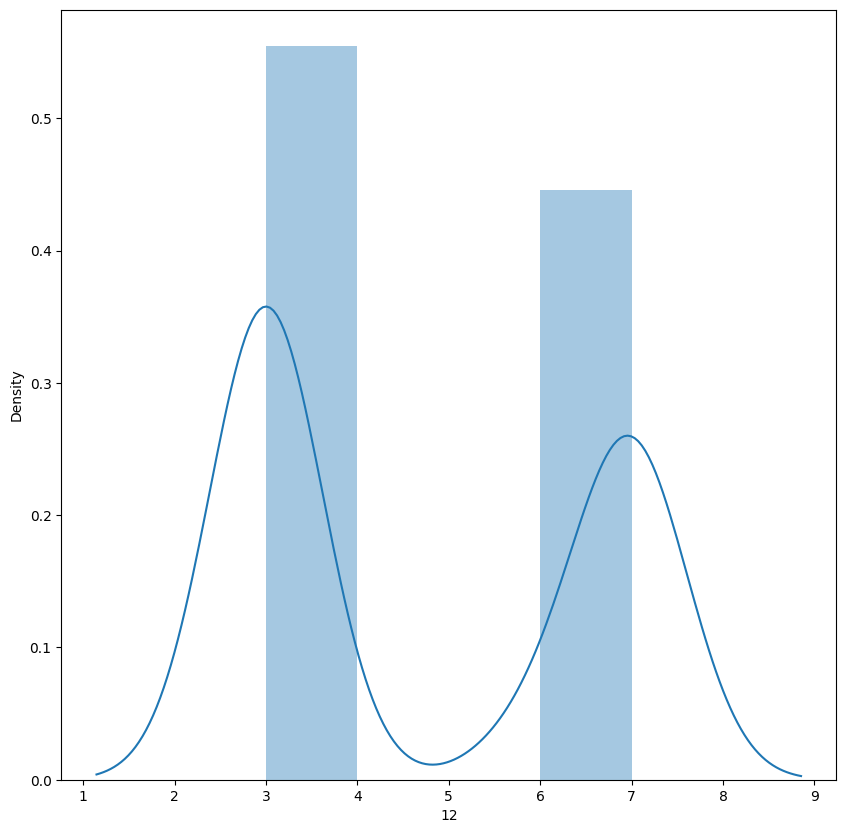

In [61]:
fig,ax=plt.subplots(figsize=(10,10))
sns.distplot(data[12])

In [59]:
data[12].fillna(data[12].mode()[0],inplace=True)

In [62]:
data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [64]:
data = data.apply(pd.to_numeric, errors='coerce')



In [66]:
data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# Feature Selection
Remove Low-Variance Features

Eliminate Highly Correlated Features

Apply Dimensionality Reduction (PCA)

In [67]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


In [68]:
variance = data.var()
print(variance)

0       81.697419
1        0.218368
2        0.921841
3      309.751120
4     2680.849190
5        0.126877
6        0.989968
7      523.265775
8        0.220707
9        1.348095
10       0.379735
11       0.873058
12       3.757327
13       1.509300
dtype: float64


1.Remove low variance features

In [69]:
data = data.loc[:, variance > 0.1]

In [70]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


No feature is removed becauze even min value is also not near to 0

In [71]:
correlation=data.corr()

<Axes: >

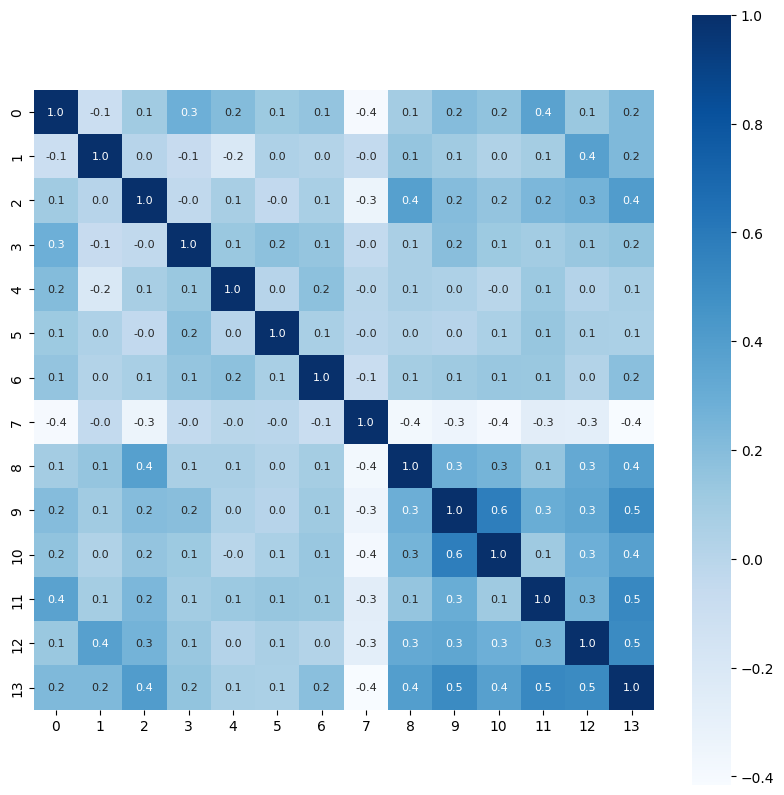

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [73]:
corr_matrix = data.corr()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]

data = data.drop(columns=to_drop)

print("Removed:", to_drop)


Removed: []


Apply Dimensionality Reduction (PCA)

In [75]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [89]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

/usr/local/lib/python3.12/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


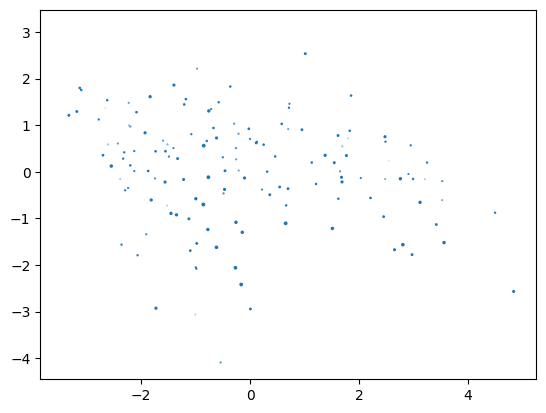

In [90]:
plt.scatter(X_pca[:,0], X_pca[:,1],X_pca[:,2])
plt.show()

In [91]:

data = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3'])


In [92]:
data.head()

,PC1,PC2,PC3
0,0.651163,-1.106431,3.071051
1,3.259755,-1.580681,-0.478407
2,2.900202,0.426239,-0.428394
3,-0.714411,1.347818,0.291130
4,-2.380295,-0.291861,-0.054078
